# Análise de Embeddings e Redução da Dimensionalidade

**Objetivo.** Dado um conjunto de textos, gerar embeddings com BERT e investigar a estrutura dos dados via PCA, t-SNE e UMAP. Em seguida, identificar clusters e relacioná-los a categorias semânticas.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [3]:
sentences = [
    'I swap butter for olive oil in many recipes.',
    'Canberra is the capital of Australia.',
    'Ottawa is the capital city of Canada.',
    'Paris is the most populated city in France.',
    'Tokyo is among the most populous metropolitan areas worldwide.',
    'I prefer my coffee with no sugar and a splash of milk.',
    'The recipe for pasta carbonara is simple.',
    'A pinch of salt enhances sweetness in desserts.',
    'Alignment techniques reduce harmful outputs.',
    'Explainable AI highlights salient features for decisions.',
    'Transformer models enable long-range language dependencies.',
    'Black swan events stress-test portfolio resilience.',
    'The Sahara Desert spans much of North Africa.',
    'Inflation erodes real purchasing power of cash.',
    'Aromatics like garlic and onion build flavor early.',
    'Value stocks trade at lower multiples relative to fundamentals.',
    'Quantization reduces memory with minimal accuracy loss.',
    'Tax-loss harvesting offsets capital gains.',
    'Investing in technology can be risky.',
    'Fermented foods add acidity and complexity.',
    'Marinating tofu improves texture and taste.',
    'Vector databases power semantic search at scale.',
    'Distillation transfers knowledge from large to small models.',
    'The Great Barrier Reef lies off Australia’s northeast coast.',
    'Retrieval-augmented generation grounds answers in sources.',
    'Iceland lies on the Mid-Atlantic Ridge.',
    'The Baltic states border the eastern Baltic Sea.',
    'Multimodal learning aligns text with images and audio.',
    'Risk tolerance should guide position sizing.',
    'Time in the market beats timing the market.',
    'Behavioral biases can derail investment plans.',
    'Reinforcement learning fine-tunes policies from human feedback.',
    'Edge AI runs models under strict latency constraints.',
    'Deglazing lifts browned bits to make pan sauces.',
    'Tempering chocolate stabilizes cocoa butter crystals.',
    'What is the capital of France?',
    'Johannesburg is a major city but not South Africa’s capital.',
    'The Danube passes through multiple European capitals.',
    'The Amazon River carries one of the largest water volumes on Earth.',
    'A healthy emergency fund reduces forced selling.',
    'I batch-cook grains for quick lunches.',
    'Resting steak helps redistribute the juices.',
    'The Atacama is one of the driest deserts on the planet.',
    'Liquidity risk rises when trading volumes are thin.',
    'Mount Everest is the highest peak above sea level.',
    'Graph neural networks capture relational structure.',
    'Sourdough starter needs regular feedings to stay active.',
    'The stock market experienced a drop today.',
    'Umami-rich ingredients deepen savory dishes.',
    'Al dente pasta retains a slight bite after cooking.',
    'Rebalancing restores target asset allocation.',
    'Continual learning mitigates catastrophic forgetting.',
    'Bond duration measures sensitivity to interest-rate changes.',
    'Diffusion models synthesize high-fidelity images.',
    'Expense ratios compound against long-term returns.',
    'Self-supervised pretraining reduces labeled data needs.',
    'What country contains the city of Kyoto?',
    'Stir-frying requires high heat and constant movement.',
    'Covered calls generate income with capped upside.',
    'The Nile flows northward into the Mediterranean Sea.',
    'Causal inference distinguishes correlation from effect.',
    'Prompt engineering steers generative behavior reliably.',
    'Few-shot prompting improves generalization on new tasks.',
    'Growth investing prioritizes earnings expansion.',
    'The Alps stretch across several central European countries.',
    'The Andes form a continuous mountain range along South America.',
    'I cook vegetarian meals on weekdays to simplify planning.',
    'Natural language processing has advanced greatly.',
    'Sous-vide delivers precise temperature control.',
    'Diversification reduces idiosyncratic risk across holdings.',
    'Sharpe ratio evaluates risk-adjusted performance.',
    'Artificial intelligence is transforming the world.',
    'Credit spreads widen during economic uncertainty.',
    'Emerging markets add diversification but higher volatility.',
    'Mise en place speeds up weeknight cooking.',
    'The Caspian Sea is a landlocked body of water.',
    'Evaluation with benchmarks must avoid data leakage.',
    'Cairo sits along the Nile River delta.',
    'Federated learning trains models without centralizing data.',
    'Lagos is Nigeria’s largest city by population.',
    'Dollar-cost averaging smooths entry price over time.',
    'LoRA adapters enable efficient fine-tuning.',
    'I keep a jar of homemade pesto for pasta.',
    'New Delhi serves as the seat of India’s government.',
    'I like to cook Italian dishes on Sundays.',
    'Roasting vegetables caramelizes natural sugars.',
    'ETFs provide broad market exposure with intraday liquidity.',
    'Proofing time affects a bread’s crumb structure.'
]

## Predição dos Embeddings

Utilize o modelo BERT pré-treinado para gerar embeddings de todos os textos fornecidos.  
O objetivo é obter uma matriz `X` com formato **(N, dim)**, onde **N** é o número de textos e **dim** é a dimensionalidade dos vetores de embedding.

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model_name = 'sentence-transformers/all-MiniLM-L6-v2'
model = SentenceTransformer(model_name, device=device)

print(f"Modelo '{model_name}' carregado com sucesso no dispositivo '{device}'.")
print(f"Dimensão do embedding: {model.get_sentence_embedding_dimension()}")

X = model.encode(sentences)

print("Embedding primeiros 5 valores:", X[0, :5])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Modelo 'sentence-transformers/all-MiniLM-L6-v2' carregado com sucesso no dispositivo 'cpu'.
Dimensão do embedding: 384
Embedding primeiros 5 valores: [-0.05245963 -0.07178463  0.0277141   0.01968163  0.00380771]


## PCA

Aplique **PCA (Principal Component Analysis)** para projetar os embeddings em duas dimensões e visualizar a estrutura global dos dados.  
O PCA ajuda a capturar as direções de maior variância e pode indicar agrupamentos lineares.

**Tarefas:**
- Reduza a dimensionalidade dos embeddings para 2 componentes principais.  
- Plote os pontos resultantes com `matplotlib`, identificando possíveis agrupamentos.  
- Analise qualitativamente se há separação entre textos de temas distintos.

In [14]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        cov_matrix = np.cov(X_centered, rowvar=False)

        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        X_centered = X - self.mean

        X_projected = np.dot(X_centered, self.components.T)

        return X_projected

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


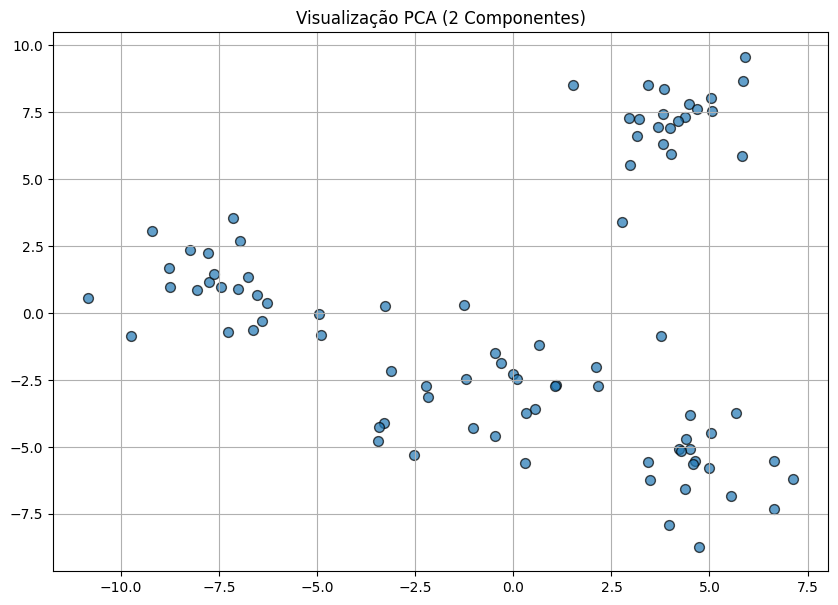

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7, edgecolors='k', s=50)
plt.title('Visualização PCA (2 Componentes)')
plt.grid(True)
plt.show()

## t-SNE

Use **t-SNE (t-distributed Stochastic Neighbor Embedding)** para investigar a estrutura local dos dados.  
Diferente do PCA, o t-SNE tenta preservar vizinhanças locais e pode revelar grupos mais sutis.

**Tarefas:**
- Reduza os embeddings para 2D usando `TSNE` do `scikit-learn`.  
- Ajuste parâmetros como `perplexity` e `learning_rate` para comparar resultados.  
- Visualize o mapa e observe se os textos semelhantes ficam próximos.

In [16]:
class TSNE:
    def __init__(self, n_components=2, perplexity=30.0, lr=200.0, n_iter=500):
        self.n_components = n_components
        self.perplexity = perplexity
        self.lr = lr
        self.n_iter = n_iter

    def _distances(self, X):
        sum_X = np.sum(X**2, axis=1)
        return np.add(np.add(-2 * X @ X.T, sum_X).T, sum_X)

    def _p_matrix(self, D):
        n = D.shape[0]
        P = np.zeros((n, n))
        logU = np.log2(self.perplexity)

        for i in range(n):
            beta = 1.0
            Di = np.delete(D[i], i)

            for _ in range(30):
                P_i = np.exp(-Di * beta)
                P_i /= np.sum(P_i)
                H = -np.sum(P_i * np.log2(P_i + 1e-12))
                if abs(H - logU) < 1e-3:
                    break
                beta *= 1.2 if H > logU else 0.8

            P[i, np.arange(n) != i] = P_i

        P = (P + P.T) / (2 * n)
        return np.maximum(P, 1e-12)

    def fit_transform(self, X):
        n = X.shape[0]

        D = self._distances(X)
        P = self._p_matrix(D)

        Y = np.random.randn(n, self.n_components)

        for it in range(self.n_iter):
            sum_Y = np.sum(Y**2, axis=1)
            num = 1 / (1 + np.add(np.add(-2 * Y @ Y.T, sum_Y).T, sum_Y))
            np.fill_diagonal(num, 0)
            Q = np.maximum(num / np.sum(num), 1e-12)

            PQ = P - Q
            for i in range(n):
                dY_i = np.sum((PQ[:, i] * num[:, i])[:, None] * (Y[i] - Y), axis=0)
                Y[i] -= self.lr * dY_i
            Y -= np.mean(Y, axis=0)

            if (it + 1) % 100 == 0:
                cost = np.sum(P * np.log(P / Q))
                print(f"Iter {it+1:4d}: cost = {cost:.4f}")

        return Y

In [17]:
custom_tsne = TSNE(n_components=2, perplexity=20.0, n_iter=1000, lr=200)

X_tsne = custom_tsne.fit_transform(X)

Iter  100: cost = 0.3269
Iter  200: cost = 0.3079
Iter  300: cost = 0.3017
Iter  400: cost = 0.2988
Iter  500: cost = 0.2971
Iter  600: cost = 0.2960
Iter  700: cost = 0.2952
Iter  800: cost = 0.2947
Iter  900: cost = 0.2943
Iter 1000: cost = 0.2939


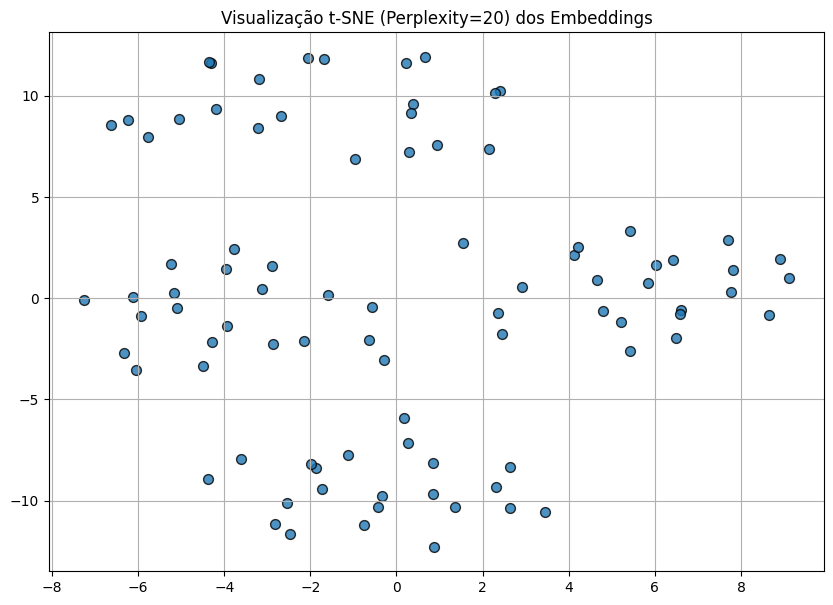

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.8, edgecolors='k', s=50)
plt.title('Visualização t-SNE (Perplexity=20) dos Embeddings')
plt.grid(True)
plt.show()

## UMAP

Aplique **UMAP (Uniform Manifold Approximation and Projection)** como alternativa ao t-SNE.  
O UMAP é mais eficiente, preserva parte da estrutura global e é útil para visualização e pré-processamento.

**Tarefas:**
- Gere uma projeção 2D dos embeddings com `umap.UMAP`.  
- Experimente variar `n_neighbors` e `min_dist` para observar mudanças na distribuição dos clusters.  
- Compare visualmente com os resultados do PCA e t-SNE.

In [19]:
class UMAP:
    def __init__(self, n_neighbors=15, n_components=2, n_epochs=200, lr=0.5, random_state=None):
        self.n_neighbors = n_neighbors
        self.n_components = n_components
        self.n_epochs = n_epochs
        self.lr = lr
        self.random_state = np.random.RandomState(random_state)
        self.a, self.b = 1.929, 0.7915

    def _find_sigma(self, distances, rho):
        """Busca binária para encontrar sigma."""
        target = np.log2(self.n_neighbors)
        low, high = 1e-3, 10.0
        for _ in range(30):
            mid = (low + high) / 2
            psum = np.sum(np.exp(-(np.maximum(0, distances - rho)) / mid))
            if abs(psum - target) < 1e-5:
                return mid
            if psum > target:
                high = mid
            else:
                low = mid
        return mid

    def _build_neighbor_graph(self, X):
        """Etapa 1: constrói o grafo de vizinhança baseado em distâncias."""
        n = X.shape[0]

        knn = NearestNeighbors(n_neighbors=self.n_neighbors).fit(X)
        dists, inds = knn.kneighbors(X)

        rho = dists[:, 1]
        sigma = np.zeros(n)
        for i in range(n):
            sigma[i] = self._find_sigma(dists[i, 1:], rho[i])

        rows = np.repeat(np.arange(n), self.n_neighbors)
        cols = inds.flatten()

        dist = np.linalg.norm(X[rows] - X[cols], axis=1)

        dist = np.maximum(0, dist - rho[rows])

        p = np.exp(-dist / (sigma[rows] + 1e-8))

        p_matrix = np.zeros((n, n))
        p_matrix[rows, cols] = p
        p = p_matrix + p_matrix.T - p_matrix * p_matrix.T

        rows, cols = np.where(p > 0)
        p = p[rows, cols]
        p /= (p.max() + 1e-8)
        return rows, cols, p

    def _optimize_embedding(self, rows, cols, weights, Y):
        """Etapa 2: otimiza as posições no espaço reduzido."""
        eps = 1e-8
        for _ in range(self.n_epochs):
            i = self.random_state.randint(0, len(weights), len(Y))
            j = cols[i]
            diff = Y[rows[i]] - Y[j]
            dist2 = np.sum(diff**2, axis=1)
            grad = (2 * self.a * self.b * (dist2 + eps)**(self.b - 1) /
                    (1 + self.a * (dist2 + eps)**self.b))[:, None] * diff
            Y[rows[i]] -= self.lr * grad
            Y[j] += self.lr * grad

            neg_i = self.random_state.randint(0, len(Y), len(Y))
            neg_j = self.random_state.randint(0, len(Y), len(Y))
            diff = Y[neg_i] - Y[neg_j]
            dist2 = np.sum(diff**2, axis=1)
            grad = (-self.b / (1 + self.a * (dist2 + eps)**self.b))[:, None] * diff
            Y[neg_i] -= self.lr * grad

        return Y

    def fit_transform(self, X):
        """Executa o UMAP simplificado."""
        rows, cols, weights = self._build_neighbor_graph(X)
        Y = self.random_state.normal(scale=0.01, size=(X.shape[0], self.n_components))
        return self._optimize_embedding(rows, cols, weights, Y)

Iter  100: cost = 0.3301
Iter  200: cost = 0.3108
Iter  300: cost = 0.3039
Iter  400: cost = 0.3003
Iter  500: cost = 0.2980
Iter  600: cost = 0.2965
Iter  700: cost = 0.2954
Iter  800: cost = 0.2946
Iter  900: cost = 0.2939
Iter 1000: cost = 0.2934


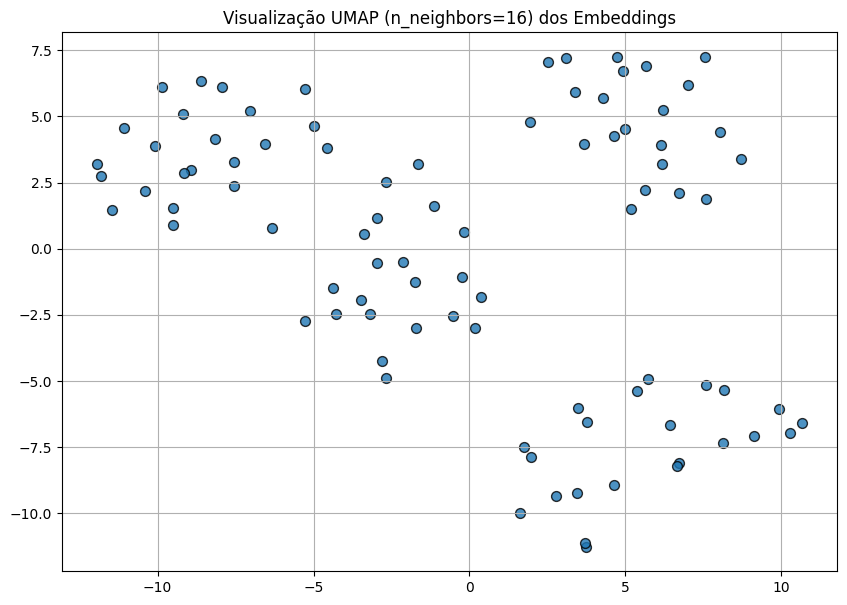

In [20]:
custom_umap = UMAP(n_neighbors=16, n_components=2, n_epochs=500, random_state=42)
X_umap = custom_tsne.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.8, edgecolors='k', s=50)
plt.title('Visualização UMAP (n_neighbors=16) dos Embeddings')
plt.grid(True)
plt.show()

## Classificação

Com base nas categorias observadas nos gráficos anteriores, crie uma função simples que receba um texto e classifique-o na categoria mais provável.

**Tarefas:**
- Use os embeddings existentes e os clusters identificados para rotular automaticamente cada texto.  
- Crie uma função `classificar_texto(texto: str)` que:
  1. Gere o embedding do texto.
  2. Calcule a distância para os clusters identificados.
  3. Retorne o nome do cluster mais próximo.

In [21]:
class KMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """
        Inicializa os centróides selecionando K pontos aleatórios do dataset.
        """
        np.random.seed(self.random_state)
        n_samples = X.shape[0]
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

    def _assign_clusters(self, X):
        """
        Atribui cada ponto de dado ao centróide mais próximo.
        """
        n_samples = X.shape[0]
        distances = np.zeros((n_samples, self.n_clusters))

        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.sum((X - centroid)**2, axis=1)

        self.labels = np.argmin(distances, axis=1)

    def _update_centroids(self, X):
        """
        Atualiza a posição de cada centróide com base na média dos pontos atribuídos a ele.
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))

        for i in range(self.n_clusters):
            cluster_points = X[self.labels == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                new_centroids[i] = self.centroids[i]

        self.centroids = new_centroids

    def fit(self, X):
        """
        Executa o algoritmo K-Means.
        """
        self._initialize_centroids(X)

        for _ in range(self.max_iter):
            old_centroids = self.centroids.copy()
            self._assign_clusters(X)
            self._update_centroids(X)
            if np.allclose(old_centroids, self.centroids):
                break

    def predict(self, X):
        """
        Atribui clusters para novos dados com base nos centróides aprendidos.
        """
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.sum((X - centroid)**2, axis=1)

        return np.argmin(distances, axis=1)

In [22]:
def classificar_texto(texto: str):
    embedding_1d = model.encode([texto])[0]

    embedding_2d = embedding_1d.reshape(1, -1)

    cluster_index = kmeans.predict(embedding_2d)[0]

    return cluster_map[cluster_index]

In [23]:
K = 4
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X)

cluster_map = {
    0: "Culinária/Comida",
    1: "Finanças/Investimentos",
    2: "Geografia/Cidades",
    3: "Inteligência Artificial"
}

teste_ia = "What is reinforcement learning?"
teste_financas = "Should I invest in bonds or stocks?"
teste_geografia = "The capital of Brazil is Brasilia."
teste_culinaria = "How to make a good pizza dough?"
teste_ptbr = "Natal é uma cidade com investimentos em IA"

print(f"'{teste_ia}' -> {classificar_texto(teste_ia)}")
print(f"'{teste_financas}' -> {classificar_texto(teste_financas)}")
print(f"'{teste_geografia}' -> {classificar_texto(teste_geografia)}")
print(f"'{teste_culinaria}' -> {classificar_texto(teste_culinaria)}")
print(f"'{teste_ptbr}' -> {classificar_texto(teste_ptbr)}")



'What is reinforcement learning?' -> Inteligência Artificial
'Should I invest in bonds or stocks?' -> Culinária/Comida
'The capital of Brazil is Brasilia.' -> Geografia/Cidades
'How to make a good pizza dough?' -> Finanças/Investimentos
'Natal é uma cidade com investimentos em IA' -> Geografia/Cidades
